In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

from glove.model import *

from sklearn.model_selection import KFold

In [2]:
# import file names
files = os.listdir("data/")
strains = ["MS014"]

# fit gLV models

In [3]:
def predict_df(df, species):
    
    # save measured and predicted values
    exp_names = []
    pred_species = []
    pred = []
    stdv = []
    true = []

    # pull just the community data
    test_data = process_df(df, species) 

    # plot the results
    for exp, t_span, Y_m in test_data:

        # predict 
        Y_p, Y_std = model.predict(Y_m, t_span)
        
        # set NaN to zero
        Y_p = np.nan_to_num(Y_p)
        Y_std = np.nan_to_num(Y_std)
        
        ### prediction results for species that were present ###
        inds_present = Y_m[0] > 0 
        exp_names.append([exp]*sum(inds_present)*(Y_m.shape[0]-1))
        pred_species.append(np.tile(np.vstack(species)[inds_present], Y_m.shape[0]-1).T.ravel())
        true.append(Y_m[1:,inds_present].ravel())
        pred.append(Y_p[1:,inds_present].ravel())
        stdv.append(Y_std[1:,inds_present].ravel())
                
    # concatenate list
    exp_names = np.concatenate(exp_names)
    pred_species = np.concatenate(pred_species)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    stdv = np.concatenate(stdv)
        
    return exp_names, pred_species, true, pred, stdv

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Total samples: 78, Initial regularization: 1.00e-03
Loss: 14.428, Residuals: -0.275
Loss: 10.824, Residuals: 0.189
Loss: 10.195, Residuals: 0.114
Loss: 7.406, Residuals: 0.056
Loss: 6.337, Residuals: 0.073
Loss: 6.099, Residuals: 0.061
Loss: 5.753, Residuals: 0.041
Loss: 5.398, Residuals: 0.017
Loss: 5.366, Residuals: 0.026
Loss: 5.315, Residuals: 0.022
Loss: 5.298, Residuals: 0.023
Loss: 5.269, Residuals: 0.018
Loss: 5.228, Residuals: 0.007
Loss: 5.222, Residuals: 0.012
Loss: 5.212, Residuals: 0.010
Loss: 5.194, Residuals: 0.007
Loss: 5.193, Residuals: 0.013
Loss: 5.184, Residuals: 0.010
Loss: 5.170, Residuals: 0.005
Loss: 5.166, Residuals: 0.005
Loss: 5.160, Residuals: 0.004
Loss: 5.157, Residuals: 0.005
Loss: 5.153, Residuals: 0.003
Loss: 5.151, Residuals: 0.004
Loss: 5.147, Residuals: 0.003
Loss: 5.146, Residuals: 0.005
Loss: 5.143, Residuals: 0.004
Loss: 5.137, Residuals: 0.003
Loss: 5.135, Residuals: 0.005
Loss: 5.131, Residuals: 0.004
Loss: 5.130, Residuals: 0.004
Loss: 5.127, R

Evidence -55.435
Updating hyper-parameters...
Total samples: 77, Updated regularization: 5.65e-01
Loss: 85.199, Residuals: -0.034
Loss: 84.485, Residuals: -0.044
Loss: 83.183, Residuals: -0.035
Loss: 81.182, Residuals: -0.016
Loss: 81.121, Residuals: -0.021
Loss: 79.303, Residuals: 0.001
Loss: 79.155, Residuals: -0.011
Optimization terminated successfully.
Evidence 661.535
Updating hyper-parameters...
Total samples: 77, Updated regularization: 9.82e-01
Loss: 222.051, Residuals: -0.017
Loss: 220.859, Residuals: -0.010
Loss: 219.063, Residuals: -0.006
Loss: 218.854, Residuals: -0.007
Loss: 218.497, Residuals: -0.005
Loss: 218.209, Residuals: -0.004
Loss: 218.179, Residuals: -0.005
Loss: 218.128, Residuals: -0.004
Loss: 218.082, Residuals: -0.003
Loss: 218.079, Residuals: -0.004
Optimization terminated successfully.
Evidence 876.470
Updating hyper-parameters...
Total samples: 77, Updated regularization: 1.27e+00
Loss: 289.451, Residuals: -0.002
Loss: 289.041, Residuals: -0.003
Loss: 288.7

Loss: 79.376, Residuals: 0.016
Loss: 79.246, Residuals: 0.017
Loss: 79.224, Residuals: 0.017
Loss: 79.183, Residuals: 0.017
Loss: 79.116, Residuals: 0.018
Loss: 79.100, Residuals: 0.018
Loss: 79.072, Residuals: 0.018
Loss: 79.064, Residuals: 0.017
Loss: 79.050, Residuals: 0.017
Loss: 79.027, Residuals: 0.018
Loss: 79.020, Residuals: 0.018
Loss: 79.014, Residuals: 0.017
Loss: 79.005, Residuals: 0.017
Loss: 79.003, Residuals: 0.017
Optimization terminated successfully.
Evidence 719.566
Updating hyper-parameters...
Total samples: 81, Updated regularization: 1.96e+00
Loss: 230.883, Residuals: 0.019
Loss: 230.346, Residuals: 0.019
Loss: 229.689, Residuals: 0.019
Loss: 229.606, Residuals: 0.022
Loss: 229.469, Residuals: 0.021
Loss: 229.333, Residuals: 0.022
Loss: 229.321, Residuals: 0.022
Loss: 229.301, Residuals: 0.022
Loss: 229.296, Residuals: 0.022
Optimization terminated successfully.
Evidence 966.636
Updating hyper-parameters...
Total samples: 81, Updated regularization: 3.05e+00
Loss: 

Loss: 301.143, Residuals: 0.021
Loss: 301.064, Residuals: 0.021
Loss: 301.061, Residuals: 0.021
Optimization terminated successfully.
Evidence 972.902
Updating hyper-parameters...
Total samples: 81, Updated regularization: 2.79e+00
Loss: 315.804, Residuals: 0.021
Loss: 315.657, Residuals: 0.019
Loss: 315.623, Residuals: 0.018
Loss: 315.571, Residuals: 0.019
Loss: 315.568, Residuals: 0.019
Optimization terminated successfully.
Evidence 977.761
Updating hyper-parameters...
Total samples: 81, Updated regularization: 2.89e+00
Loss: 318.930, Residuals: 0.019
Loss: 318.894, Residuals: 0.018
Loss: 318.869, Residuals: 0.017
Loss: 318.865, Residuals: 0.017
Optimization terminated successfully.
Evidence 979.457
Updating hyper-parameters...
Total samples: 81, Updated regularization: 2.92e+00
Loss: 320.029, Residuals: 0.017
Loss: 320.017, Residuals: 0.017
Loss: 320.007, Residuals: 0.016
Loss: 320.006, Residuals: 0.017
Optimization terminated successfully.
Evidence 980.278
Pass count  1
Total sampl

Loss: 323.065, Residuals: -0.005
Loss: 323.063, Residuals: -0.005
Optimization terminated successfully.
Evidence 997.244
Updating hyper-parameters...
Total samples: 82, Updated regularization: 2.27e+00
Loss: 323.816, Residuals: -0.005
Loss: 323.801, Residuals: -0.006
Loss: 323.798, Residuals: -0.006
Optimization terminated successfully.
Evidence 997.748
Pass count  1
Total samples: 83, Initial regularization: 1.00e-03
Loss: 16.114, Residuals: -0.328
Loss: 12.807, Residuals: 0.226
Loss: 8.676, Residuals: 0.087
Loss: 7.888, Residuals: 0.065
Loss: 6.664, Residuals: 0.044
Loss: 6.152, Residuals: 0.030
Loss: 6.043, Residuals: 0.028
Loss: 5.851, Residuals: 0.019
Loss: 5.571, Residuals: 0.007
Loss: 5.538, Residuals: 0.024
Loss: 5.479, Residuals: 0.015
Loss: 5.383, Residuals: -0.001
Loss: 5.366, Residuals: 0.004
Loss: 5.335, Residuals: -0.001
Loss: 5.286, Residuals: -0.010
Loss: 5.271, Residuals: -0.008
Loss: 5.246, Residuals: -0.010
Loss: 5.238, Residuals: -0.004
Loss: 5.224, Residuals: -0.00

Total samples: 80, Updated regularization: 6.35e-01
Loss: 300.828, Residuals: -0.041
Optimization terminated successfully.
Evidence 969.282
Updating hyper-parameters...
Total samples: 80, Updated regularization: 6.68e-01
Loss: 314.393, Residuals: -0.041
Loss: 314.176, Residuals: -0.042
Loss: 314.141, Residuals: -0.040
Loss: 314.125, Residuals: -0.041
Loss: 313.997, Residuals: -0.040
Loss: 313.997, Residuals: -0.040
Optimization terminated successfully.
Evidence 971.967
Updating hyper-parameters...
Total samples: 80, Updated regularization: 6.90e-01
Loss: 316.403, Residuals: -0.040
Loss: 316.271, Residuals: -0.036
Loss: 316.269, Residuals: -0.036
Optimization terminated successfully.
Evidence 973.078
Updating hyper-parameters...
Total samples: 80, Updated regularization: 7.27e-01
Loss: 317.010, Residuals: -0.036
Loss: 317.002, Residuals: -0.037
Optimization terminated successfully.
Evidence 973.620
Pass count  1


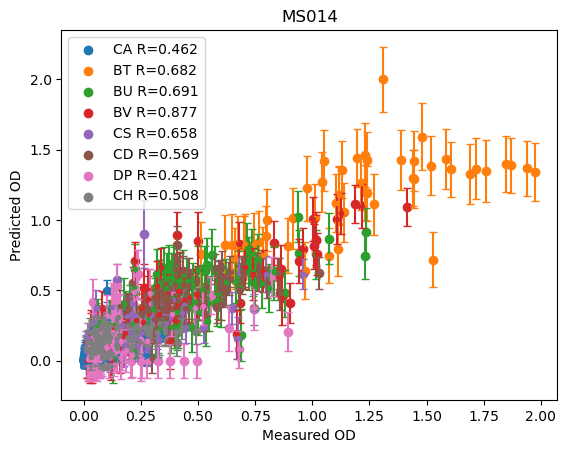

In [4]:
# run kfold for each file 
for strain in strains:
    
    # import data
    df_universal = pd.read_csv("data/Universal.csv")
    df_strain = pd.concat([pd.read_csv(f"data/{fname}") for fname in files if strain in fname])
    df = pd.concat((df_universal, df_strain))
    df.sort_values(by=["Treatments", "Time"], inplace=True)

    # determine species names 
    species = df.columns.values[2:]

    # separate mono culture data 
    mono_df = pd.concat([df_i for name, df_i in df.groupby("Treatments") if "Mono" in name])
    dfs = [df_i for name, df_i in df.groupby("Treatments") if "Mono" not in name]

    # init kfold object
    kf = KFold(n_splits=10, shuffle=True, random_state=21)

    # keep track of all predictions
    all_exp_names = []
    all_pred_species = []
    all_true = []
    all_pred = []
    all_stdv = []

    # run Kfold 
    for train_index, test_index in kf.split(dfs):
        #train_index, test_index = next(iter(kf.split(dfs)))

        # get train df 
        train_df = pd.concat([dfs[i] for i in train_index])
        train_df = pd.concat((mono_df, train_df))

        # get test df
        test_df = pd.concat([dfs[i] for i in test_index])

        # instantiate gLV fit 
        model = gLV(species, train_df)

        # fit to data 
        model.fit()

        # plot fitness to data
        exp_names, pred_species, true, pred, stdv = predict_df(test_df, species)

        # append predictions 
        all_exp_names = np.append(all_exp_names, exp_names)
        all_pred_species = np.append(all_pred_species, pred_species)
        all_true = np.append(all_true, true)
        all_pred = np.append(all_pred, pred)
        all_stdv = np.append(all_stdv, stdv)

        # save prediction results to a .csv
        kfold_df = pd.DataFrame()
        kfold_df['Treatments'] = all_exp_names
        kfold_df['species'] = all_pred_species
        kfold_df['true'] = all_true
        kfold_df['pred'] = all_pred
        kfold_df['stdv'] = all_stdv
        kfold_df.to_csv(f"kfold/{strain}_10fold.csv", index=False)
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain)
    plt.savefig(f"figures/{strain}_10fold.pdf", dpi=300)
    plt.show()

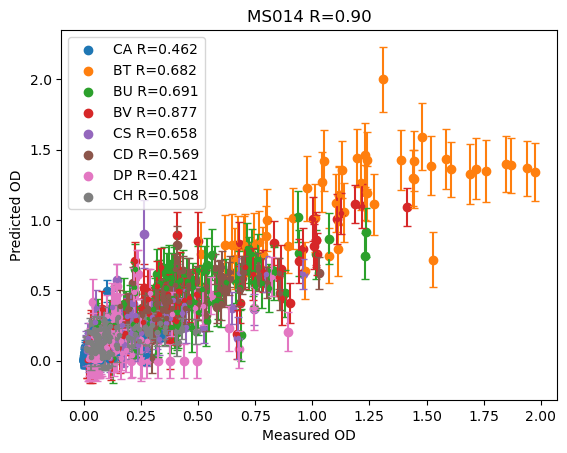

In [5]:
# run kfold for each file 
for strain in strains:
    
    # import data
    df_universal = pd.read_csv("data/Universal.csv")
    df_strain = pd.concat([pd.read_csv(f"data/{fname}") for fname in files if strain in fname])
    df = pd.concat((df_universal, df_strain))
    df.sort_values(by=["Treatments", "Time"], inplace=True)

    # determine species names 
    species = df.columns.values[2:]
    
    # load kfold results
    kfold_df = pd.read_csv(f"kfold/{strain}_10fold.csv")
        
    all_pred_species = kfold_df['species'].values
    all_true = kfold_df['true'].values 
    all_pred = kfold_df['pred'].values
    all_stdv = kfold_df['stdv'].values
        
    R_overall = linregress(all_true, all_pred).rvalue
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain + " R={:.2f}".format(R_overall))
    plt.savefig(f"figures/{strain}_10fold.pdf", dpi=300)
    plt.show()